# Imagenes en memoria
# Canales
# Histograma

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/Users/carlosalvarado/Desktop/ComputerVision/fotos/')

import plot # lo de abajo, es especial para los notebooks. 
%matplotlib inline
plt.style.use('dark_background') 

path = '/Users/carlosalvarado/Desktop/ComputerVision/fotos/'

In [58]:
im = cv.imread(path+'Baboon.tiff', cv.IMREAD_COLOR)
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)

In [59]:
rows, cols, channels = img.shape
print('Rows {0}\nCols {1}\nChannels {2}'.format(rows,cols,channels))

Rows 512
Cols 512
Channels 3


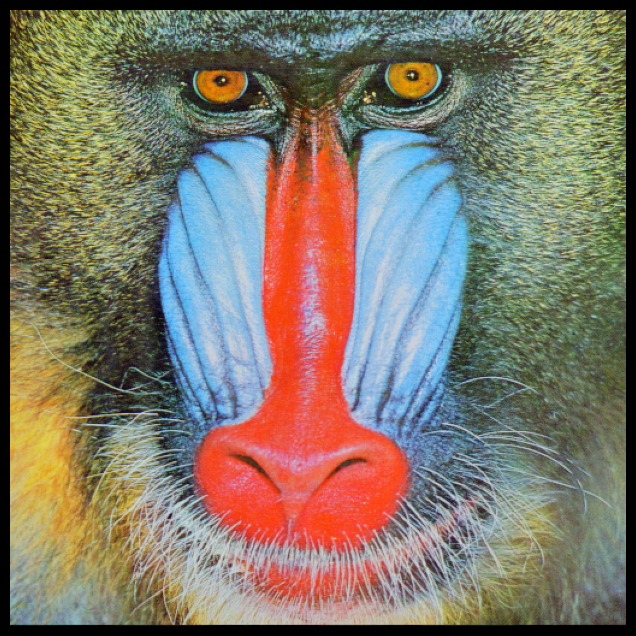

In [60]:
def imgview(img, title=None, filename=None, axis=False):
    """
    """
    r,c = img.shape[0:2]
    k=8
    fig = plt.figure(figsize=(k,k)) #creamos una figura. Es crear una instancia donde vamos a dibujar. 
    ax = fig.add_subplot(111) # sobre la misma, agrego un subplot(111), el 111 es la posición. filas, columnas y posición a la cual nos referimos el ax. 
                              # el ax, (axis) son ejes. 
    if len(img.shape) == 3:  #decido si la imagen es o no a color. Y decimos cómo dibujarla. 
        im = ax.imshow(img,extent=None) # punto el contenido del ax. extent, configurar el origen de la gráfica. 
    else:
        im = ax.imshow(img,extent=None,cmap='gray',vmin=0,vmax=255) # escala de color, min y max de la escala.
    
    # el im, sirve para reciclar el objeto. 

    if title != None:
        ax.set_title(title,fontsize=14) # si  trae un titulo, se lo pongo a la imagen. 
    
    
    if not axis: # para poner las "direcciones" o la posición de cada pixel de la imagen. 
        plt.axis('off')
    else:
        ax.grid(c='w')
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 
        ax.set_xlabel('Columns',fontsize=14)
        ax.set_ylabel('Rows',fontsize=14)
        ax.xaxis.label.set_color('w')
        ax.yaxis.label.set_color('w')
        ax.tick_params(axis='x', colors='w',labelsize=14)
        ax.tick_params(axis='y', colors='w',labelsize=14)
        
    if filename != None: # si tiene un dirección, entonces lo guarda ahí. 
        plt.savefig(filename)
    plt.show()
    
imgview(img, axis=False)

In [61]:
# first row of the image in channel 0
print(img[0:rows,0:2,0])

[[164  63]
 [120 135]
 [ 99 132]
 ...
 [121 123]
 [126 117]
 [  9  10]]


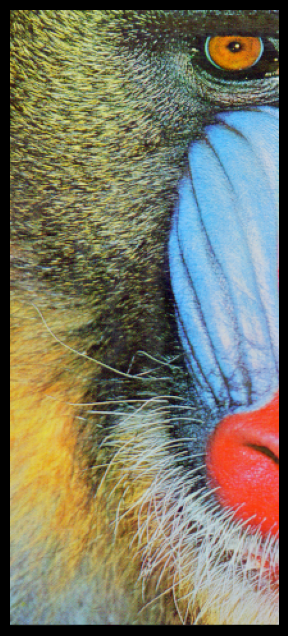

In [62]:
imgview(img[30:512,0:210,0:3], axis=False)

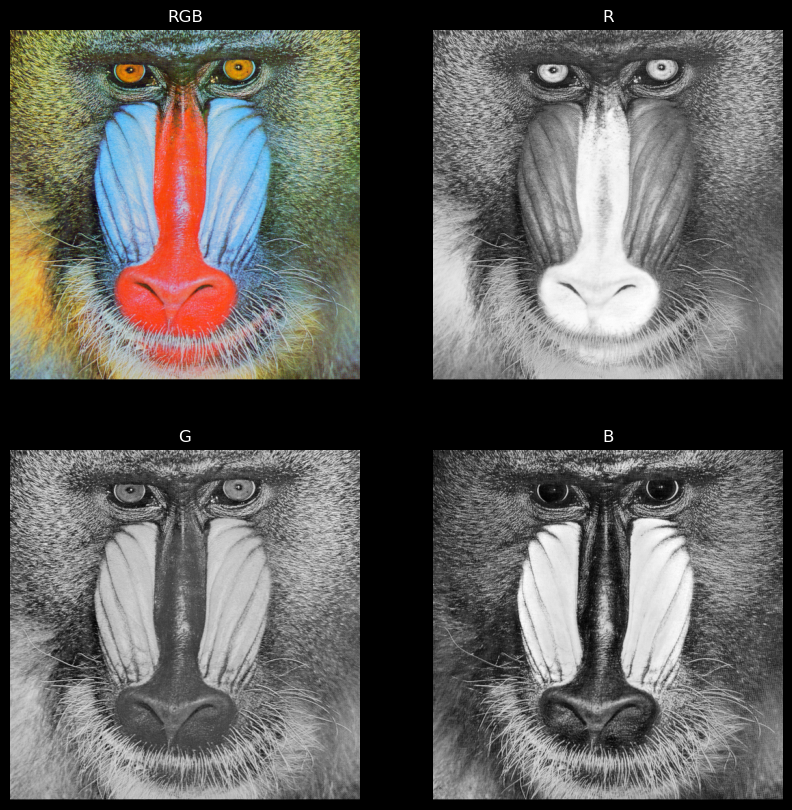

In [63]:
def splitrgb(img, filename=None):
    """
    """
    if len(img.shape) != 3: # que sea color
        return 0
    
    fig = plt.figure(figsize=(10,10)) # hacer la figura
    # obtener los 3 canales de color que hay. 
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    # a la figura, le hago el subplot, los 2, 2. Son las filas y columnas, y el 1 es "la primera imagen."
    ax1 = fig.add_subplot(221)
    ax1.imshow(img)
    ax1.set_title('RGB')
    plt.axis('off') # adios esquinas y mediciones para la posicion de los pixeles.
    ax2 = fig.add_subplot(222)
    ax2.imshow(r,cmap='gray', vmin=0, vmax=255) # pongo el plano y la escala que quiero. 
    ax2.set_title('R')
    plt.axis('off') # adios esquinas y mediciones para la posicion de los pixeles.
    ax3 = fig.add_subplot(223)
    ax3.imshow(g,cmap='gray', vmin=0, vmax=255) # pongo el plano y la escala que quiero. 
    ax3.set_title('G')
    plt.axis('off') # adios esquinas y mediciones para la posicion de los pixeles.
    ax4 = fig.add_subplot(224)
    ax4.imshow(b,cmap='gray', vmin=0, vmax=255) # pongo el plano y la escala que quiero. 
    ax4.set_title('B')
    plt.axis('off')
    if filename != None: # si tiene un dirección, entonces lo guarda ahí. 
        plt.savefig(filename)
    
    
    plt.show()

splitrgb(img)

In [64]:
for v in img[255,0:512,2]:
    print(v, end=' | ')

100 | 107 | 91 | 83 | 59 | 63 | 83 | 79 | 66 | 72 | 89 | 79 | 96 | 93 | 88 | 117 | 95 | 99 | 100 | 114 | 121 | 119 | 123 | 147 | 130 | 142 | 142 | 129 | 117 | 87 | 84 | 68 | 75 | 86 | 97 | 90 | 114 | 97 | 64 | 61 | 69 | 63 | 59 | 69 | 97 | 135 | 161 | 146 | 126 | 100 | 82 | 98 | 93 | 90 | 101 | 56 | 66 | 81 | 67 | 76 | 59 | 48 | 60 | 76 | 52 | 36 | 46 | 46 | 28 | 58 | 63 | 52 | 30 | 35 | 32 | 48 | 78 | 91 | 85 | 75 | 80 | 73 | 59 | 60 | 50 | 64 | 86 | 57 | 29 | 35 | 26 | 19 | 25 | 36 | 32 | 43 | 43 | 48 | 50 | 36 | 45 | 57 | 39 | 36 | 73 | 62 | 34 | 36 | 23 | 35 | 32 | 31 | 34 | 63 | 54 | 60 | 64 | 80 | 108 | 52 | 31 | 24 | 16 | 23 | 31 | 57 | 50 | 33 | 98 | 219 | 239 | 245 | 246 | 235 | 232 | 242 | 239 | 241 | 239 | 231 | 233 | 229 | 216 | 209 | 202 | 156 | 177 | 217 | 231 | 236 | 238 | 235 | 233 | 232 | 232 | 232 | 232 | 225 | 228 | 226 | 223 | 228 | 228 | 223 | 224 | 223 | 214 | 214 | 209 | 212 | 221 | 193 | 193 | 210 | 220 | 228 | 225 | 221 | 219 | 218 | 225 | 222 | 222 | 223 | 224

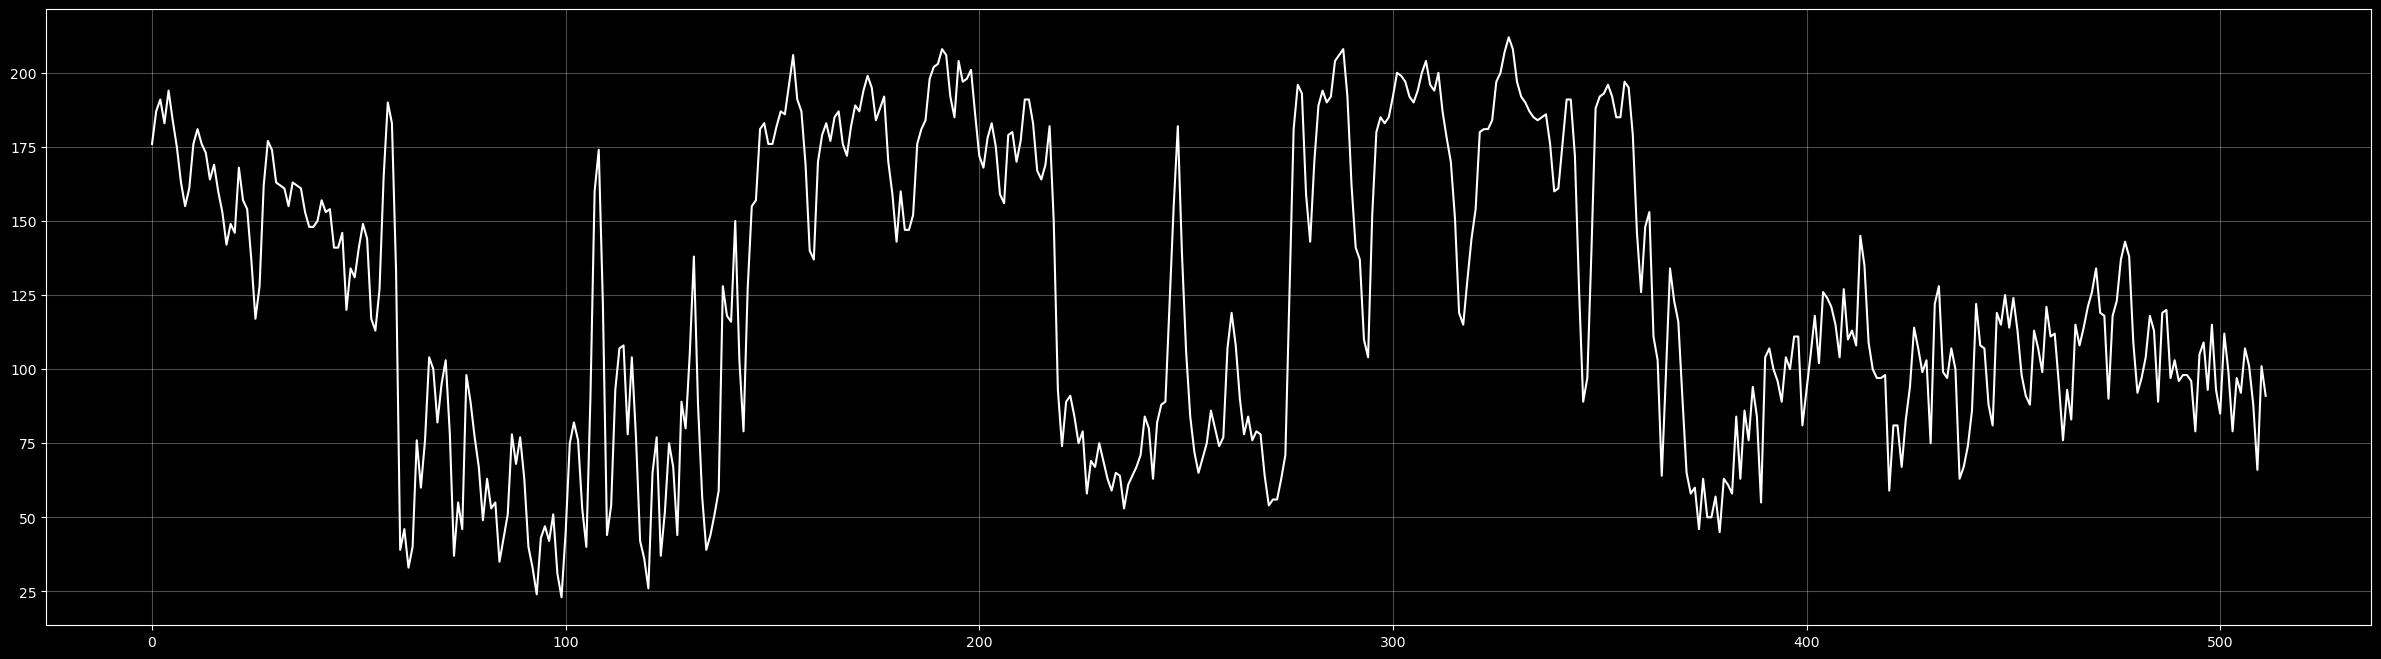

In [65]:
# Vemos un "plano" de cómo vemos la imagen. 
# es ver el comportamiento de una línea que representa el comportamiento del plano. 

fig, ax = plt.subplots(figsize=(30,8))
ax.plot(img[300,:,1], c='w')
ax.set_facecolor('k')
ax.grid(alpha=0.3)
plt.show()

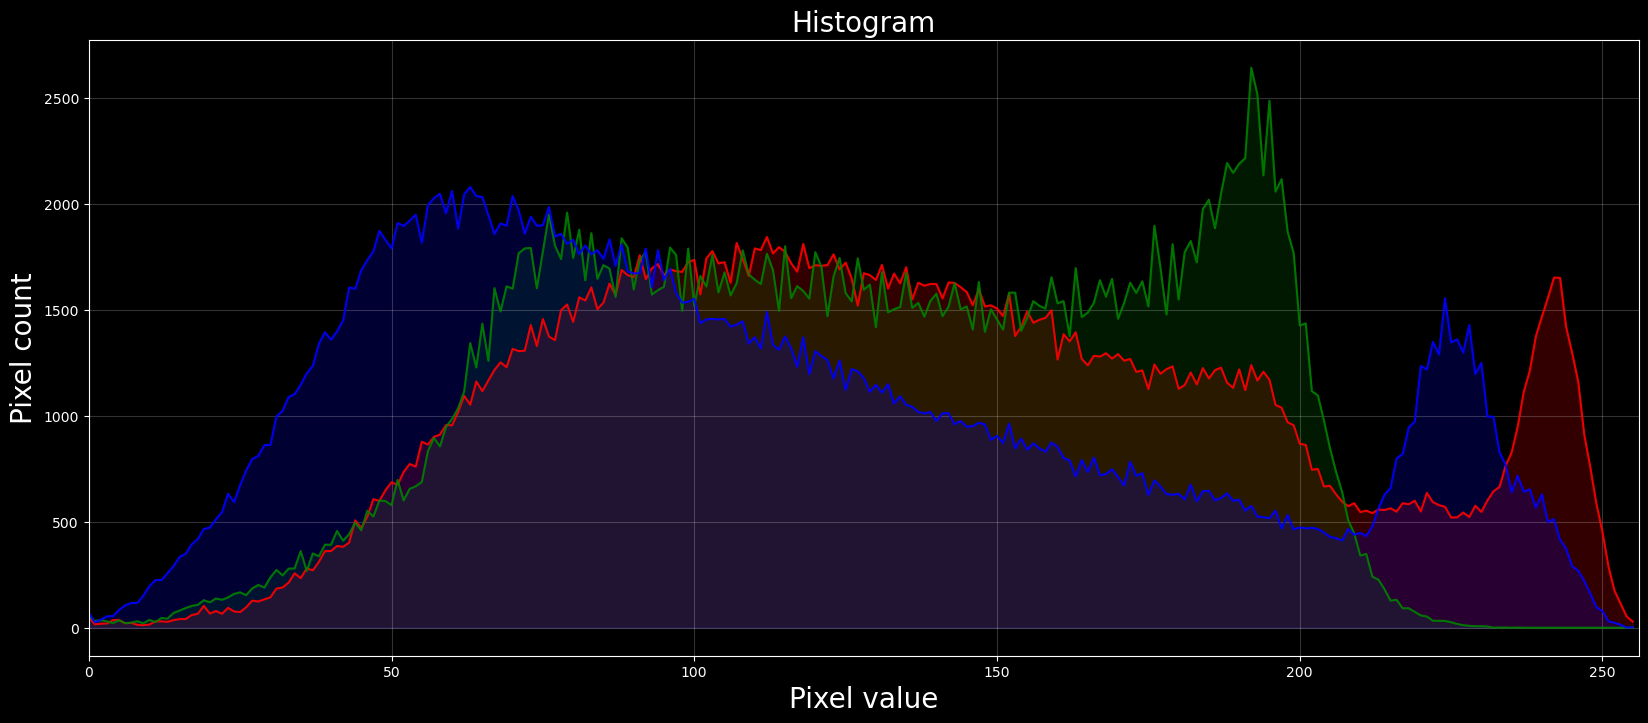

In [66]:
def hist(img,fill=False,filename=None):
    fig, ax = plt.subplots(figsize=(20,8))
    colors = ['r','g','b']
    for i, color in enumerate(colors):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        ax.plot(histr, c=color, alpha=0.9)
        x = np.arange(0.0, 256, 1)
        if fill:
            ax.fill_between(x, 0, histr.ravel(), alpha=0.2, color=color)
    ax.set_xlim([0,256])
    ax.grid(alpha=0.2)
    ax.set_facecolor('k')
    ax.set_title('Histogram', fontsize=20)
    ax.set_xlabel('Pixel value', fontsize=20)
    ax.set_ylabel('Pixel count', fontsize=20)

    if filename != None:
        plt.savefig(filename)
    plt.show()

hist(img,True)

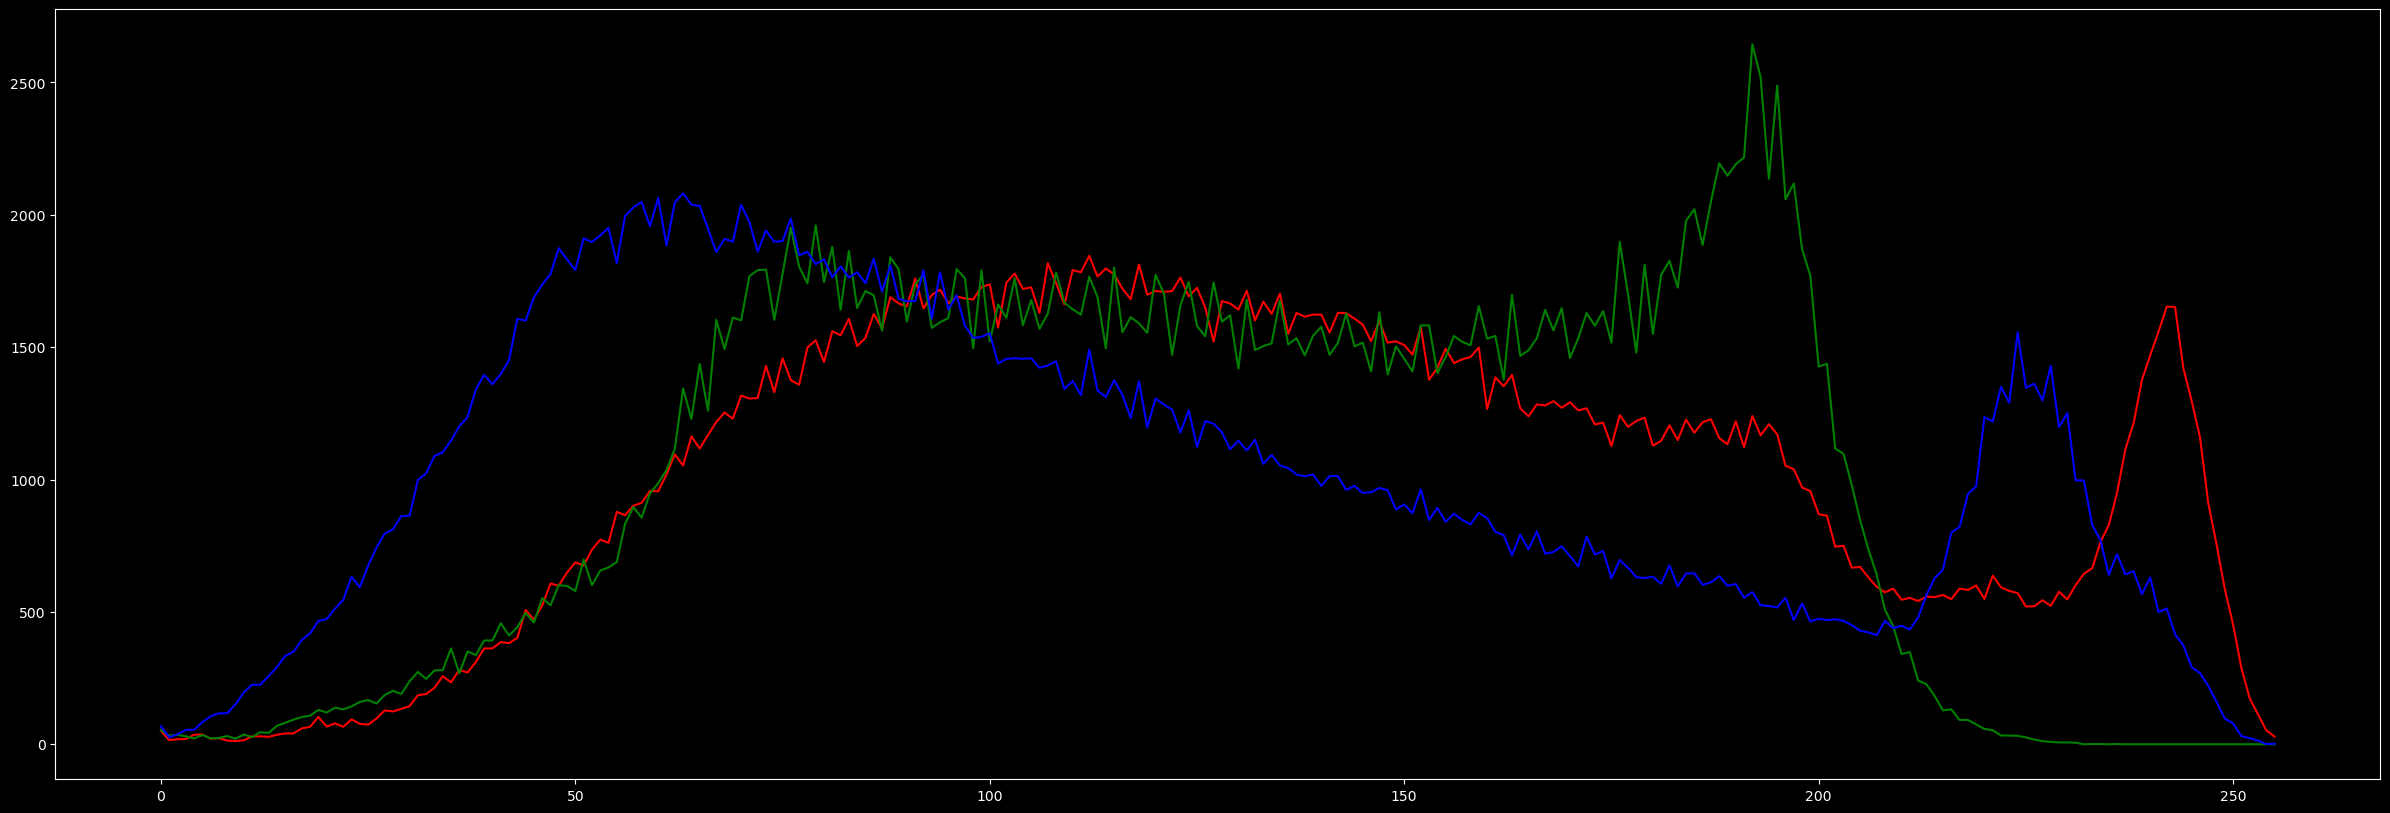

In [67]:
def hist(img,filename=None):
    
    fig = plt.figure(figsize=(30,10))
    ax1 = fig.add_subplot(111)
    colors = ['r','g','b']
    for i,color in enumerate(colors):
        histr = cv.calcHist([img],[i],None,[256],[0,256])
        ax1.plot(histr,c=color)
    plt.show()
hist(img)